# Análise do covid no Brasil

## Introdução

Esta é uma análise exploratória inicial dos dados do COVID-19 no Brasil.


### Objetivo

O principal objetivo é entender a distribuição da população contaminada por COVID-19 e verificar se fatores como idade, sexo e fatores de risco contribuem para complicação da doença.


### Metodologia

Na primeira parte, é feita uma análise na base e em suas variáveis, entendendo o significado e distribuição delas. E caso necessário, realizamos alguma limpeza/tratamento.

Na segunda parte da análise, criamos algumas hipóteses a respeito dos dados. 

### Resultado Esperado

O resultado sera analisado por meio de graficos, a fim de entendermos as distribuições e suas caracteristicas.
Além disso, podera ser usado um comparativo para ver se as hipóteses possuem significância estatística.


## Base de Dados

Foi utilizado dados abertos disponíveis em [https://opendatasus.saude.gov.br/dataset/bd-srag-2020](https://opendatasus.saude.gov.br/dataset/bd-srag-2020) com a data de 18/05/2020.

Esta base é disponibilizada pelo ***Vigilância de Síndrome Respiratória Aguda Grave (SRAG)***. O SRAG é um programa da Secretaria de Vigilância em Saúde (SVS).

O Dicionário com o significado de cada uma das colunas esta localizado [Aqui](https://opendatasus.saude.gov.br/dataset/9bc2013f-f293-4f3e-94e7-fa76204fc035/resource/20e51b77-b129-4fd5-84f6-e9428ab5e286/download/dicionario_de_dados_srag_hospitalizado_atual-sivepgripe.pdf)

**Um ponto importante** é que os casos que constam nesta base são os casos mais severos e que necessitaram de atendimento médico. Conforme a recomendação do Ministério da Saúde para a população, os casos com sintomas não tão severos recomendava-se a não ir no pronto atendimento. Ou seja, é importante ter em mente que esses dados não representam a real situação da doença no Brasil, e sim uma amostra.

## Análise da Base e das Características

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
pd.options.display.max_columns = 20
sns.set(style="whitegrid")

In [29]:
# Nao esquecer de descompactar a base de dados
# df_full = pd.read_csv('data/INFLUD-08-06-2020.csv', sep=';', engine='python-fwf', encoding='utf8')
df_full = pd.read_csv('data/INFLUD-08-06-2020.csv', sep=';', engine='c', encoding='utf8', error_bad_lines=False, low_memory=False)


b'Skipping line 76847: expected 143 fields, saw 144\nSkipping line 93838: expected 143 fields, saw 145\nSkipping line 168040: expected 143 fields, saw 144\nSkipping line 229834: expected 143 fields, saw 144\nSkipping line 249189: expected 143 fields, saw 145\n'


In [30]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252610 entries, 0 to 252609
Columns: 143 entries, #NU_NOTIFIC to PAC_DSCBO
dtypes: float64(89), object(54)
memory usage: 275.6+ MB


### Removendo um pouco das colunas
A base possui muitas colunas (141), e ao analisar o Dicionário de dados, notei que muitas delas não serão úteis para análise da população do COVID. Vamos ler o documento de Discionário e fazer uma filtragem em alto nível de quais colunas serão retiradas.

In [33]:
cols_to_drop = ['CS_ETINIA', 'ID_PAIS', 'ID_RG_RESI', 'CO_RG_RESI', 'AVE_SUINO', 'NOSOCOMIAL', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE', 'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'ANTIVIRAL', 'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'RAIOX_RES', 'RAIOX_OUT', 'DT_RAIOX', 'AMOSTRA', 'DT_COLETA', 'TP_AMOSTRA', 'OUT_AMOST', 'REQUI_GAL', 'DT_IF', 'POS_IF_FLU', 'TP_FLU_IF', 'POS_IF_OUT', 'IF_VSR', 'IF_PARA1', 'IF_PARA2', 'IF_PARA3', 'IF_ADENO', 'IF_OUTRO', 'DS_IF_OUT', 'LAB_IF', 'CO_LAB_IF', 'PCR_RESUL', 'DT_PCR', 'TP_FLU_PCR', 'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT', 'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO', 'CO_UN_INTE', 'NM_UN_INTE', 'OBSERVA',]
df_clean = df_full.drop(cols_to_drop, axis=1)

In [34]:
df_clean.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252610 entries, 0 to 252609
Columns: 72 entries, #NU_NOTIFIC to DT_DIGITA
dtypes: float64(48), object(24)
memory usage: 138.8+ MB


In [35]:
df_clean.sample(4)

,#NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,...,IF_RESUL,POS_PCRFLU,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA
155002,315909551181,30/05/2020 00:00:00,22,09/05/2020 00:00:00,19.0,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,...,NaN,9.0,HC DA FMUSP HOSPITAL DAS CLINICAS SAO PAULO,2078015.0,5.0,1.0,NaN,NaN,NaN,31/05/2020 00:00:00
225626,315906876868,26/05/2020 00:00:00,22,11/05/2020 00:00:00,20.0,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28/05/2020 00:00:00
89953,315792612022,14/01/2020 00:00:00,03,11/01/2020 00:00:00,2.0,CE,21 CRES JUAZEIRO DO NORTE,1531.0,BARBALHA,230190.0,...,4.0,NaN,NaN,NaN,4.0,NaN,2.0,13/01/2020 00:00:00,18/03/2020 00:00:00,17/01/2020 00:00:00
232507,315916275175,04/06/2020 00:00:00,23,04/06/2020 00:00:00,23.0,RS,007 CRS,1596.0,BAGE,430160.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/06/2020 00:00:00


In [36]:
df = df_clean

# Mantendo apenas os casos de COVID
df = df[df.CLASSI_FIN==5]

### Entendendo um pouco das características

Ao analisar o Dicionario de dados, notei algumas colunas importantes para análise, então as separei em 5 grupos:
* Sintomas
* Fatores de Risco
* Localização
* Informações Pessoais
* Dados da Internação

In [37]:
sintomas_cols = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_DES']
# OUTRO_DES if OUTRO_SIN == 1
df[sintomas_cols].sample(4)

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_DES
251297,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN
64691,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
133968,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN
73595,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,MIALGIA


In [38]:
fatores_risco_cols = ['PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'MORB_DESC']
# MORB_DESC if OUT_MORBI == 1
# if OBESIDADE==1 then OBES_IMC is not null
df[fatores_risco_cols].sample(4)

,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,MORB_DESC
167902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140298,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN
72038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
localizacao_cols = ['SG_UF_NOT', 'ID_MUNICIP', 'ID_UNIDADE', 'CO_PAIS', 'SG_UF', 'ID_MN_RESI', 'CS_ZONA', 'ID_MN_INTE',]
df[localizacao_cols].sample(4)

,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,CO_PAIS,SG_UF,ID_MN_RESI,CS_ZONA,ID_MN_INTE
157740,RJ,NITEROI,POLICLINICA REGIONAL DO LARGO DA BATALHA,1.0,RJ,NITEROI,1.0,NaN
240038,SP,SAO PAULO,HOSPITAL BP,1.0,SP,SAO PAULO,NaN,SAO PAULO
59742,PA,BOM JESUS DO TOCANTINS,HOSPITAL E MATERNIDADE POPULAR,1.0,PA,BOM JESUS DO TOCANTINS,1.0,BOM JESUS DO TOCANTINS
137457,SP,SAO PAULO,HOSPITAL SANTA PAULA,1.0,SP,SAO PAULO,1.0,SAO PAULO


In [40]:
info_p_cols = ['CS_SEXO', 'DT_NASC', 'NU_IDADE_N', 'TP_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N']
df[info_p_cols].sample(4)

,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N
126212,M,17/10/1943 00:00:00,76.0,3.0,6.0,1.0,1.0
186037,F,16/09/1945 00:00:00,74.0,3.0,5.0,9.0,9.0
199169,F,02/08/1949 00:00:00,70.0,3.0,5.0,4.0,9.0
250056,F,13/12/1965 00:00:00,54.0,3.0,5.0,NaN,NaN


In [41]:
internacao_cols = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'UTI', 'DT_ENTUTI', 'DT_SAIDUTI', 'SUPORT_VEN', 'IF_RESUL', 'POS_PCRFLU', 'LAB_PCR', 'CO_LAB_PCR', 'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA']
df[internacao_cols].sample(4)

,DT_NOTIFIC,DT_SIN_PRI,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,IF_RESUL,POS_PCRFLU,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA
50717,06/05/2020 00:00:00,25/04/2020 00:00:00,02/05/2020 00:00:00,2.0,NaN,NaN,1.0,5.0,NaN,SES RJ LACENN RJ LABORATORIO CENTRAL NOEL NUTELS,2766779.0,5.0,1.0,2.0,06/05/2020 00:00:00,22/05/2020 00:00:00,07/05/2020 00:00:00
24648,21/05/2020 00:00:00,02/05/2020 00:00:00,05/05/2020 00:00:00,2.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,5.0,1.0,2.0,09/05/2020 00:00:00,02/06/2020 00:00:00,21/05/2020 00:00:00
102625,23/04/2020 00:00:00,12/04/2020 00:00:00,23/04/2020 00:00:00,2.0,NaN,NaN,2.0,5.0,NaN,FLEURY,9674098.0,5.0,1.0,NaN,NaN,27/04/2020 00:00:00,23/04/2020 00:00:00
107401,27/03/2020 00:00:00,17/03/2020 00:00:00,22/03/2020 00:00:00,1.0,22/03/2020 00:00:00,02/04/2020 00:00:00,2.0,5.0,2.0,DELBONI AURIEMO MED DIAG HOSP STA PAULA,3124347.0,5.0,1.0,1.0,04/04/2020 00:00:00,09/04/2020 00:00:00,31/03/2020 00:00:00


## Entendendo as caracteristicas e criando hipóteses

Nesta etapa vamos dar uma olhada melhor nas colunas e bolar algumas hipóteses, afim de alcançar o objetivo desta análise.

### Idade

O primeiro fator de risco apontado pelas notícias é a idade. Então vamos entender um pouco sobre

In [42]:
df.NU_IDADE_N.describe()

count    92662.000000
mean        58.060154
std         18.735852
min          0.000000
25%         45.000000
50%         59.000000
75%         72.000000
max        136.000000
Name: NU_IDADE_N, dtype: float64

(0.0, 110.0)

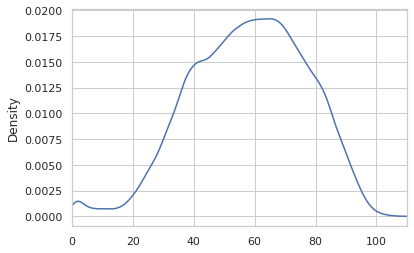

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1)
df.NU_IDADE_N.plot.kde(ax=ax)
ax.set_xlim(0,110)

In [45]:
df.groupby('EVOLUCAO').NU_IDADE_N.describe()

,count,mean,std,min,25%,50%,75%,max
EVOLUCAO,,,,,,,,
1.0,35639.0,51.568310,17.550686,0.0,39.0,51.0,64.0,136.0
2.0,31788.0,67.658991,16.071937,0.0,58.0,69.0,80.0,114.0
9.0,4044.0,53.599407,18.032476,0.0,41.0,54.0,67.0,100.0


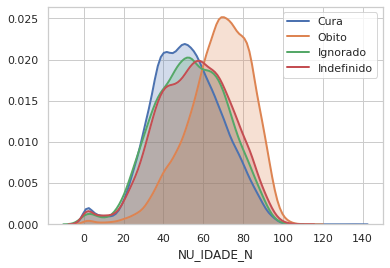

In [66]:
sns.distplot(df[df.EVOLUCAO == 1].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Cura')
sns.distplot(df[df.EVOLUCAO == 2].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Obito')
sns.distplot(df[df.EVOLUCAO == 9].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Ignorado')
sns.distplot(df[~df.EVOLUCAO.isin([1, 2, 9])].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Indefinido')
, ax=ax

In [89]:
df['IDADE_BINS'] = df.NU_IDADE_N.map(lambda age: 10 * (age // 10))
df['EVOLUCAO_BINS'] = df.EVOLUCAO.map(lambda x: 9 if x not in (1, 2, 9) else x).map({1:'Cura', 2:'Obito', 9:'Indefinido'})

/home/fabio.jorge/Desktop/EXTRA/COVID/covid_analysis/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/fabio.jorge/Desktop/EXTRA/COVID/covid_analysis/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


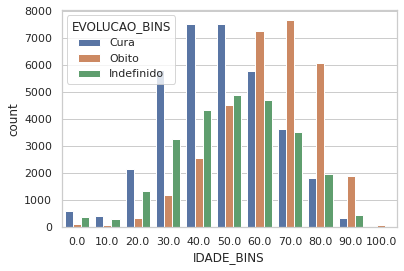

In [91]:
sns.countplot('IDADE_BINS',hue='EVOLUCAO_BINS',data=df[df.IDADE_BINS <= 100])
